In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2023,12,2.75,2.0,5293
1,1,2023,11,3.23,2.3,5227
2,2,2023,10,2.20,2.4,5193
3,3,2023,9,1.50,2.5,5124
4,4,2023,8,3.20,2.2,5112


In [4]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,2.0,5293
1,3.23,2.3,5227
2,2.20,2.4,5193
3,1.50,2.5,5124
4,3.20,2.2,5112


In [6]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

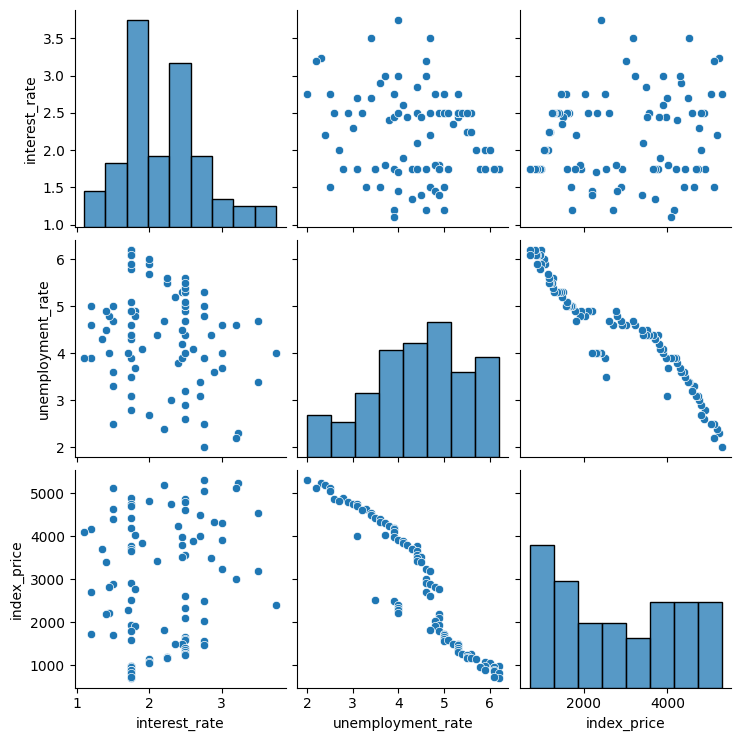

In [7]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.221091,0.161483
unemployment_rate,-0.221091,1.000000,-0.936644
index_price,0.161483,-0.936644,1.000000


Text(0, 0.5, 'unemployment rate')

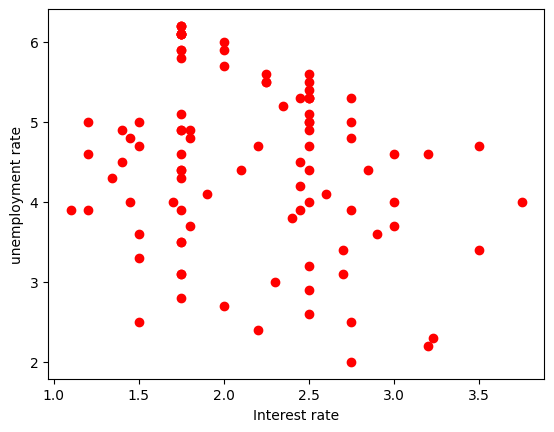

In [9]:
## Visualiza the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [10]:
##independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,2.0
1,3.23,2.3
2,2.20,2.4
3,1.50,2.5
4,3.20,2.2


In [12]:
y

0     5293
1     5227
2     5193
3     5124
4     5112
      ... 
91     866
92     876
93     822
94     704
95     719
Name: index_price, Length: 96, dtype: int64

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

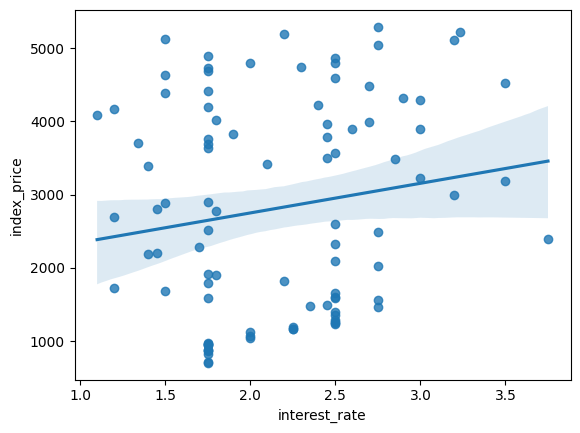

In [15]:
sns.regplot(data=df_index, x='interest_rate', y='index_price')


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

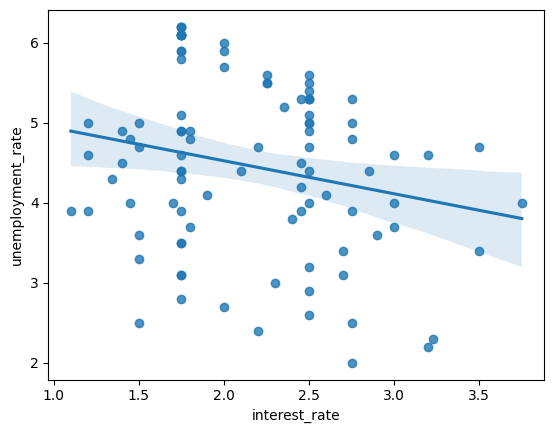

In [16]:
sns.regplot(data=df_index, x='interest_rate', y='unemployment_rate')

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

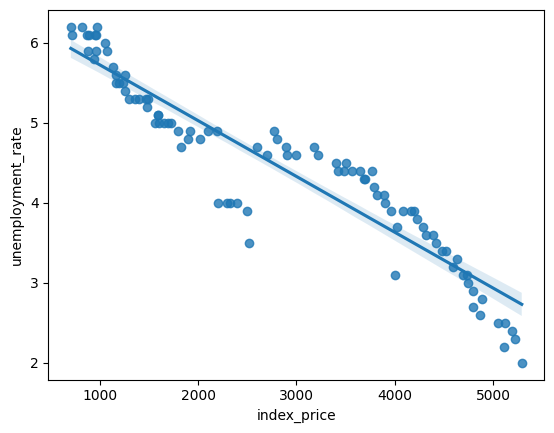

In [17]:
sns.regplot(data=df_index, x='index_price', y='unemployment_rate')


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [20]:
X_train


array([[-0.69917617,  1.62908684],
       [ 0.65261449, -1.52039268],
       [-0.06834053, -0.08881108],
       [-0.69917617, -1.32951514],
       [-1.14977306,  0.19750524],
       [-1.23989243, -0.47056617],
       [ 1.55380827, -0.47056617],
       [ 1.10321138,  0.77013788],
       [ 0.56249511,  0.77013788],
       [ 1.10321138, -1.90214778],
       [-0.69917617,  0.10206647],
       [ 0.65261449,  0.19750524],
       [-0.69917617, -0.08881108],
       [ 1.013092  , -1.04319882],
       [-0.60905679,  0.38838279],
       [-0.69917617, -0.18424985],
       [ 0.65261449, -1.806709  ],
       [-0.69917617,  1.53364807],
       [ 0.56249511, -0.56600495],
       [ 1.37356951, -0.85232127],
       [ 0.65261449,  0.96101543],
       [-0.60905679, -0.7568825 ],
       [-0.69917617,  1.53364807],
       [-1.14977306, -1.13863759],
       [-1.87072808, -0.56600495],
       [-1.14977306, -1.90214778],
       [-0.69917617, -0.94776004],
       [ 1.28345013, -0.08881108],
       [-0.24857928,

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [22]:
regression.fit(X_train,y_train)

LinearRegression()

In [23]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=5)

In [24]:
print(validation_score)
np.mean(validation_score)


[-242908.8491703  -172810.94766478 -473654.9132514  -208802.54886367
 -305247.25409752]


-280684.9026095326

In [25]:
## prediction
y_pred=regression.predict(X_test)

In [26]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

281910.8929353237
446.64467519076607
530.9528161101734


In [27]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


0.8748204798916468
0.8628986208337084


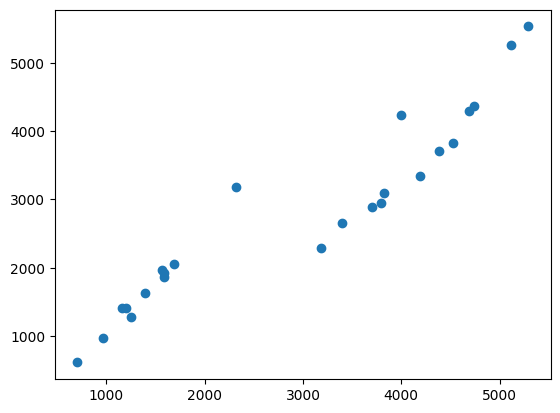

In [28]:
plt.scatter(y_test,y_pred)

In [29]:
residuals=y_test-y_pred
print(residuals)

80   -253.679987
77    -24.386695
73   -240.103616
94     89.884192
33    809.227946
79   -217.679987
69   -329.411184
42    899.346482
0    -238.268758
10    369.156538
64   -363.704476
30    729.298338
18    675.283228
4    -153.826372
31    847.456811
26   -231.117580
12    401.142678
22    850.721133
53   -854.543605
85     -4.832729
40    746.145596
67   -282.248230
15    698.906492
68   -409.099552
Name: index_price, dtype: float64


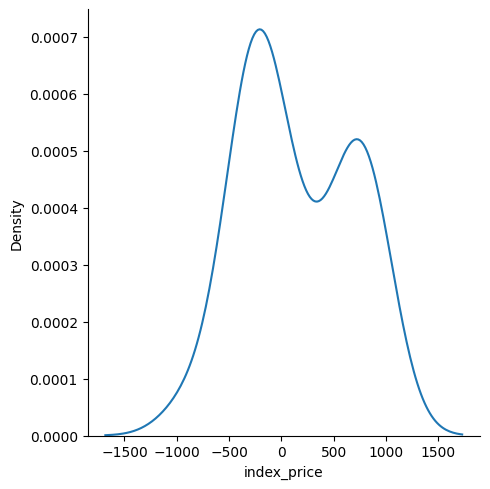

In [30]:
## Plot this residuals
sns.displot(residuals,kind='kde')

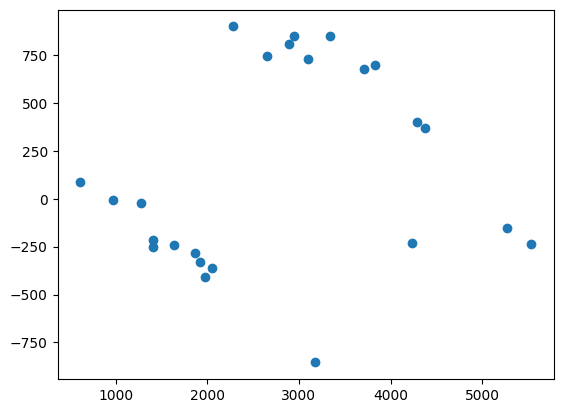

In [31]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [32]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.179
Model:                            OLS   Adj. R-squared (uncentered):              0.156
Method:                 Least Squares   F-statistic:                              7.632
Date:                Thu, 11 Apr 2024   Prob (F-statistic):                     0.00100
Time:                        09:56:29   Log-Likelihood:                         -674.30
No. Observations:                  72   AIC:                                      1353.
Df Residuals:                      70   BIC:                                      1357.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -38.6590    343.838     -0.112      0.911    -724.423     647.105
x2         -1326.1113    343.838     -3.857      0.000   -2011.875    -640.348
==============================================================================
Omnibus:                        6.340   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.648
Skew:                          -0.660   Prob(JB):                       0.0594
Kurtosis:                       3.376   Cond. No.                         1.21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print(regression.coef_)

[  -38.65899233 -1326.11130848]
